In [2]:
from scipy.io import loadmat
import matplotlib.pyplot as plt
import cv2
import numpy as np

In [3]:
def resize_3d_image(x_arr, shape=(256, 256)):
    """ Takes a 3D image (set of 2D images) and downscales each of the images.
        x_arr -- 3D image to be downscaled
        scale -- scale to be achieved. """
    num_arrays = x_arr.shape[2]
    x_new = np.zeros((shape[0], shape[1], num_arrays))
    for i in range(0, num_arrays):
        x_new[:, :, i] = cv2.resize(x_arr[:, :, i], shape)
    return x_new
        

In [4]:
def padding(x_arr, x_pad=np.zeros((256, 256, 1)), num_pad=39):
    """ Concatenates the padding layer num_pad times to the end of x_arr.
        Needed to normalize length of images in the third dimension for
        medical imaging.
        x_arr -- array to be padded in the third dimension
        x_pad -- the pad to be applied (default - 2D matrix of zeros 
        of shape (256, 256))
        num_pad -- the normalized size we want all images to have 
        (default - 39)"""
    layers_to_add = num_pad - x_arr.shape[2]
    if (layers_to_add <= 0):
        return x_arr
    for i in range(0, layers_to_add):
        x_arr = np.concatenate([x_arr, x_pad], axis=2)
    return x_arr


In [5]:
def resize_and_save(range_array=range(1, 202), path_in='data/data/fractals_', path_in_ext='.mat', path_out='data/resized/fractals_', path_out_ext='.npy'):
    """ Does resizing and padding for our set of 3D .mat images and saves them as .npy files.
        Can define a range object range_array to control what objects you want iterated over."""
    for i in range_array:
        X = loadmat(path_in + str(i) + path_in_ext)
        print(i, end=' ')
        X['X'] = padding(resize_3d_image(X['X']))
        np.save(path_out + str(i) + path_out_ext, X)
        del(X)
    return 0

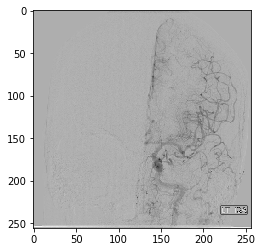

In [6]:
## Accessing the data
X = np.load('data/resized/fractals_25.npy').item()
plt.imshow(X['X'][:, :, 10], cmap='gray')

### Generating an Atlas

In [7]:
# Need to load all the images into RAM and then take the mean of them
# Or, load an image, add it to the existing sum, then delete it.
fractals_path = ['data/resized/fractals_' + str(i) + '.npy' for i in range(1, 202)]
sum_array = np.zeros((256, 256, 39))

def generate_atlas(range_array, sum_array, save=False, length=39, path_out='data/'):
    for i in range_array:
        print(i, end=' ')
        X = np.load(i).item()
        sum_array += X['X']
        del(X)
    atlas = sum_array/length
    if save:
        np.save(path_out + 'atlas.npy', atlas)
    return atlas

atlas = generate_atlas(fractals_path, sum_array, True)

data/resized/fractals_1.npy data/resized/fractals_2.npy data/resized/fractals_3.npy data/resized/fractals_4.npy data/resized/fractals_5.npy data/resized/fractals_6.npy data/resized/fractals_7.npy data/resized/fractals_8.npy data/resized/fractals_9.npy data/resized/fractals_10.npy data/resized/fractals_11.npy data/resized/fractals_12.npy data/resized/fractals_13.npy data/resized/fractals_14.npy data/resized/fractals_15.npy data/resized/fractals_16.npy data/resized/fractals_17.npy data/resized/fractals_18.npy data/resized/fractals_19.npy data/resized/fractals_20.npy data/resized/fractals_21.npy data/resized/fractals_22.npy data/resized/fractals_23.npy data/resized/fractals_24.npy data/resized/fractals_25.npy data/resized/fractals_26.npy data/resized/fractals_27.npy data/resized/fractals_28.npy data/resized/fractals_29.npy data/resized/fractals_30.npy data/resized/fractals_31.npy data/resized/fractals_32.npy data/resized/fractals_33.npy data/resized/fractals_34.npy data/resized/fractals_3

In [8]:
atlas.shape

(256, 256, 39)

In [9]:
import keras

Using TensorFlow backend.


In [10]:
from scipy import signal
X = np.load('data/resized/fractals_1.npy').item()
x_arr = X['X']

In [11]:
signal.fftconvolve(np.arange(0, 9).reshape(3,3), np.eye(3), mode='same')

array([[ 4.,  6.,  2.],
       [10., 12.,  6.],
       [ 6., 10., 12.]])

In [12]:
convolve = signal.fftconvolve(x_arr, atlas, mode='same')

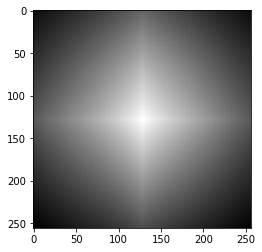

In [13]:
# I don't know what to make of this, it doesn't really give all that much information to be honest
# Data Augmentation has to be the path forward I think.
plt.imshow(convolve[:, :, 38], cmap='gray')